In [1]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [36]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as sm
import itertools
import time
from prophet import Prophet
from xgboost import plot_importance

# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('finaldataall.csv')
data

,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,...,quarter,dayofyear,dayofmonth,weekofyear,holidays_Holiday,holidays_Normal_day,month_sin,month_cos,dayofweek_sin,dayofweek_cos
0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.500000,0.866025,-0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,2023-02-25,CO,2023,8,22.0,17340235.0,501900.0,6060640.0,10749595.0,28100.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7302,2023-02-25,MI,2023,8,69.0,28917130.0,967600.0,11182320.0,16740610.0,26600.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7303,2023-02-25,MD,2023,8,45.0,21829280.0,616400.0,7305760.0,13876420.0,30700.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521
7304,2023-02-25,LA,2023,8,24.0,10141420.0,330300.0,4094680.0,5707940.0,8500.0,...,1,56,25,8,0,1,0.866025,0.500000,-0.974928,-0.222521


In [51]:
data.head()

,date,location,year,mmwr_week,covid_19_deaths,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_novavax,...,quarter,dayofyear,dayofmonth,weekofyear,holidays_Holiday,holidays_Normal_day,month_sin,month_cos,dayofweek_sin,dayofweek_cos
0,2020-01-04,AL,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.5,0.866025,-0.974928,-0.222521
1,2020-01-04,LA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.5,0.866025,-0.974928,-0.222521
2,2020-01-04,VA,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.5,0.866025,-0.974928,-0.222521
3,2020-01-04,KY,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.5,0.866025,-0.974928,-0.222521
4,2020-01-04,KS,2020,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,4,1,0,1,0.5,0.866025,-0.974928,-0.222521


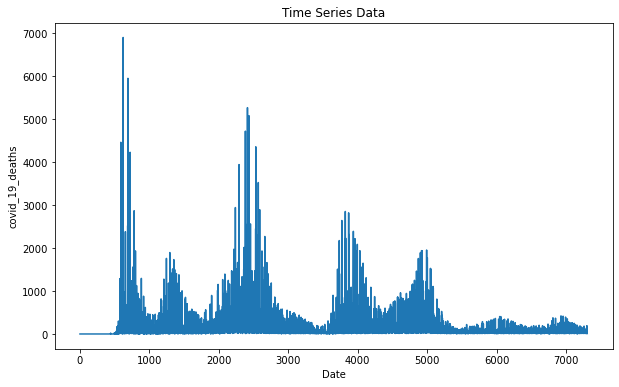

Mean: 152.28811935395566
Variance: 96433.29890605855
ADF Test p-value: 0.0014460960716783033


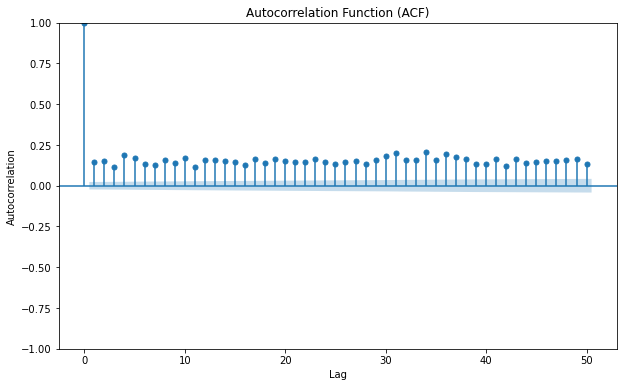

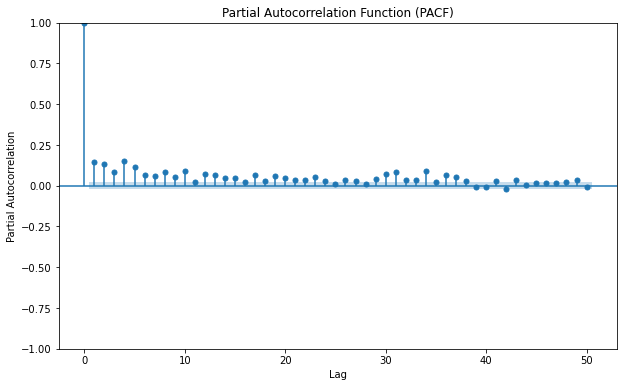

In [4]:
ts = data['covid_19_deaths']

# 1. Visual Inspection
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('covid_19_deaths')
plt.show()

# 2. Summary Statistics
print("Mean:", ts.mean())
print("Variance:", ts.var())

# 3. Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(ts)
print("ADF Test p-value:", adf_result[1])

# 5. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_acf(ts, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(ts, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [5]:
# Compute correlation between features and target
correlation_matrix = data.corr()

# Extract correlations with the target variable
correlation_with_target = correlation_matrix['covid_19_deaths']

# Print out the correlations
print(correlation_with_target)

year                  -0.077633
mmwr_week              0.021036
covid_19_deaths        1.000000
distributed            0.132591
distributed_janssen    0.158470
                         ...   
holidays_Normal_day    0.026625
month_sin              0.011471
month_cos              0.123950
dayofweek_sin               NaN
dayofweek_cos               NaN
Name: covid_19_deaths, Length: 143, dtype: float64


# Prophet Multivariate

import statsmodels.api as sm

# Define your SARIMAX model (replace the order and seasonal_order with your specific parameters)
model_baseline = sm.tsa.statespace.SARIMAX(data['covid_19_deaths'], order=(5, 1, 4), seasonal_order=(1, 1, 1, 12))

# Fit the model to your data
results_baseline = model_baseline.fit()

# Create the time range for the forecast
future_baseline = results_baseline.make_future_dataframe(periods=16)

# Make prediction
forecast_baseline = results_baseline.predict(future_baseline)

# Visualize the forecast
results_baseline.plot(forecast_baseline)

21:52:30 - cmdstanpy - INFO - Chain [1] start processing
21:52:32 - cmdstanpy - INFO - Chain [1] done processing


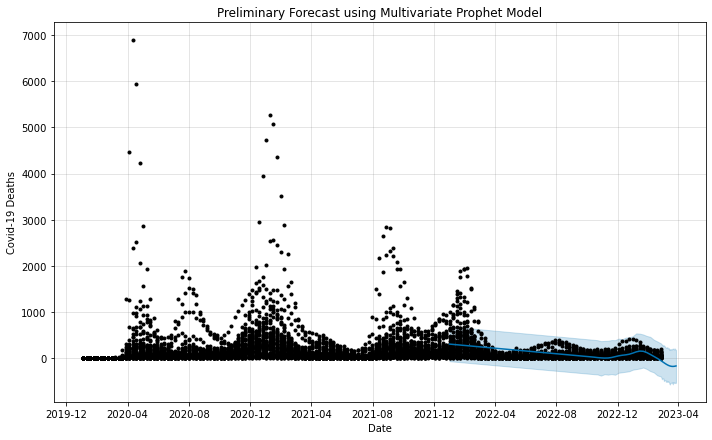

In [13]:
# Assuming 'data' is your DataFrame with 'date', 'covid_19_deaths', 'month', 'season_Winter', etc.
data_prophet = data.rename(columns={'date': 'ds', 'covid_19_deaths': 'y'})


# Initialize Prophet model
model = Prophet()


# Fit the model to the data
model.fit(data_prophet)

# Define future dates for pr
prediction_future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future


# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast along with the additional regressors
fig = model.plot(forecast, xlabel='Date', ylabel='Covid-19 Deaths')
plt.title('Preliminary Forecast using Multivariate Prophet Model')
plt.show()

22:10:18 - cmdstanpy - INFO - Chain [1] start processing
22:10:21 - cmdstanpy - INFO - Chain [1] done processing


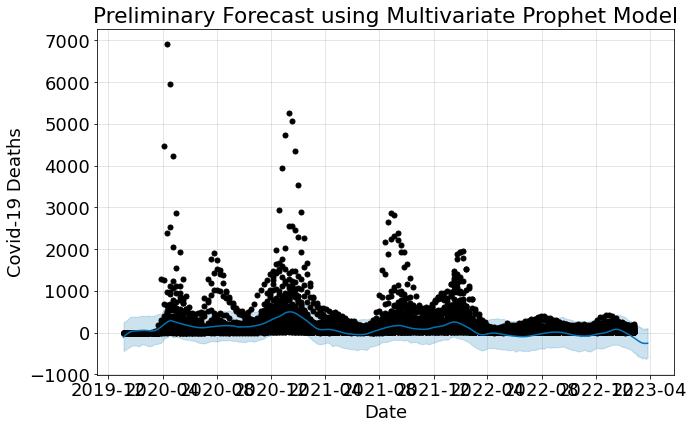

In [52]:
# 3 regressors

# Assuming 'data' is your DataFrame with 'date', 'covid_19_deaths', 'month', 'season_Winter', etc.
data_prophet = data.rename(columns={'date': 'ds', 'covid_19_deaths': 'y', 'distributed': 'regressor1', 'distributed_janssen': 'regressor2','month_cos': 'regressor3',})

data_prophet.dropna(subset=['regressor2'], inplace=True)
data_prophet.dropna(subset=['regressor3'], inplace=True) 

# Initialize Prophet model
model = Prophet()

# Add additional regressors to the model
model.add_regressor('regressor1')
model.add_regressor('regressor2')
model.add_regressor('regressor3')

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Here, you need to provide the values for the future regressors
# For demonstration purposes, I'm using a constant value
# Replace these values with your actual future regressor values
future_regressor_values_for_future_dates = 0  # Example value for regressor1
future_dates['regressor1'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor2'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor3'] = future_regressor_values_for_future_dates

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast along with the additional regressors
fig = model.plot(forecast, xlabel='Date', ylabel='Covid-19 Deaths')
plt.title('Preliminary Forecast using Multivariate Prophet Model')
plt.show()

In [58]:
# Initialize Prophet model
model = Prophet()

# Add additional regressors to the model
model.add_regressor('regressor1')
model.add_regressor('regressor2')
model.add_regressor('regressor3')

# Fit the model to the data
model.fit(data_prophet)

# Accessing parameters of the model
print("Model Parameters:")
print(model.params)

# Accessing training data used to fit the model
print("\nTraining Data:")
print(model.history)

# Accessing mode of each component in the model
print("\nComponent Modes:")
print(model.component_modes)

# Accessing scaling parameters for regularization
print("\nScaling Parameters:")
print("Seasonality Prior Scale:", model.seasonality_prior_scale)
print("Holidays Prior Scale:", model.holidays_prior_scale)
print("Changepoint Prior Scale:", model.changepoint_prior_scale)

# Accessing dates of the changepoints in the time series
print("\nChangepoints:")
print(model.changepoints)

# Accessing scaling factor for trend changepoints
print("\nScaling Factor for Trend Changepoints:")
print(model.t_scale)


22:16:30 - cmdstanpy - INFO - Chain [1] start processing
22:16:30 - cmdstanpy - INFO - Chain [1] done processing


Model Parameters:
OrderedDict([('lp__', array([[2142.65]])), ('k', array([[-0.218257]])), ('m', array([[0.234499]])), ('delta', array([[ 5.35293e-09,  1.17089e-03,  1.17089e-03,  1.23953e-03,
         6.95381e-03,  6.95381e-03,  3.17866e-02,  4.52431e-02,
         4.52431e-02,  2.33190e-02,  1.03364e-03,  1.03364e-03,
         1.60908e-07,  2.45433e-09,  2.45433e-09, -8.44759e-08,
         1.26334e-08,  1.26334e-08, -6.57978e-03, -5.64062e-02,
        -5.64062e-02, -5.76473e-02, -1.49902e-03, -1.49902e-03,
        -7.58131e-05]])), ('sigma_obs', array([[0.054374]])), ('beta', array([[-0.00044074, -0.00251862,  0.0632761 ]])), ('trend', array([[0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499 ,
        0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499 ,
        0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499 ,
        0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499 ,
        0.234499 , 0.234499 , 0.234499 , 0.234499 , 0.234499

In [56]:
#Printing Model Summary 

# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()

# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

22:10:31 - cmdstanpy - INFO - Chain [1] start processing
22:10:31 - cmdstanpy - INFO - Chain [1] done processing


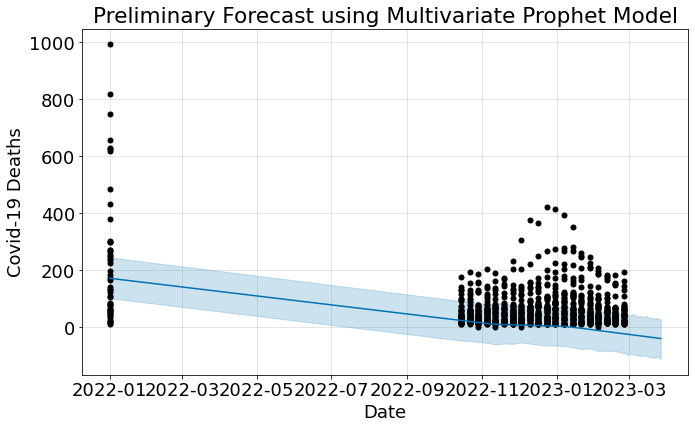

In [53]:
# 3 regressors

# Assuming 'data' is your DataFrame with 'date', 'covid_19_deaths', 'month', 'season_Winter', etc.
data_prophet = data.rename(columns={'date': 'ds', 'covid_19_deaths': 'y', 'second_booster_65plus': 'regressor1', 'additional_doses_5plus': 'regressor2','bivalent_booster_65plus': 'regressor3',})

data_prophet.dropna(subset=['regressor2'], inplace=True)
data_prophet.dropna(subset=['regressor3'], inplace=True) 

# Initialize Prophet model
model = Prophet()

# Add additional regressors to the model
model.add_regressor('regressor1')
model.add_regressor('regressor2')
model.add_regressor('regressor3')

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Here, you need to provide the values for the future regressors
# For demonstration purposes, I'm using a constant value
# Replace these values with your actual future regressor values
future_regressor_values_for_future_dates = 0  # Example value for regressor1
future_dates['regressor1'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor2'] = future_regressor_values_for_future_dates

future_regressor_values_for_future_dates = 0  # Example value for regressor2
future_dates['regressor3'] = future_regressor_values_for_future_dates

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast along with the additional regressors
fig = model.plot(forecast, xlabel='Date', ylabel='Covid-19 Deaths')
plt.title('Preliminary Forecast using Multivariate Prophet Model')
plt.show()

In [15]:
# Print fitted parameters
print(model.params)


OrderedDict([('lp__', array([[19524.9]])), ('k', array([[0.864668]])), ('m', array([[-0.0346092]])), ('delta', array([[ 1.52348e-07,  6.29866e-08, -1.07993e+00,  3.11936e-07,
         2.01807e-07,  1.24205e-07,  5.55614e-01,  3.17060e-07,
        -7.28804e-07, -6.19136e-01, -3.17465e-06, -1.88604e-07,
         2.78160e-01,  8.03208e-02,  1.15372e-02,  1.95767e-07,
        -1.46568e-01,  3.40290e-08,  1.26948e-03,  2.03806e-04,
        -3.40127e-08,  7.79143e-08, -1.56043e-08,  7.57385e-08,
        -6.64619e-02]])), ('sigma_obs', array([[0.0415768]])), ('beta', array([[-0.00329436,  0.0113052 ,  0.00513137,  0.00403687,  0.00242147,
         0.00710668,  0.00314675, -0.00014061,  0.0007617 , -0.00194054,
        -0.00042543, -0.00061565,  0.00011149,  0.00058667,  0.00087088,
        -0.00025224,  0.00034478, -0.00056032,  0.00010749, -0.00016649]])), ('trend', array([[-0.0346092 , -0.0346092 , -0.0346092 , ..., -0.00824961,
        -0.00824961, -0.00824961]]))])


# XGBoost Multivariate

In [38]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(data.drop(['covid_19_deaths'], axis=1))

# Split the target value and the features
y = data['covid_19_deaths']
X = X_encoded  # Use the encoded features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Scale the features
scaler = StandardScaler()

# Fit and transform the training data
xscaler_train = scaler.fit_transform(X_train)

# Only transform the test data (do not fit again)
xscaler_test = scaler.transform(X_test)

In [39]:
features_and_target3 = data[['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'deaths_half_year_lag',
 'deaths_1_year_lag',
 'deaths_1_andhalf_year_lag',
 'deaths_2_years_lag',
 'deaths_half_year_lag_mean',
 'deaths_1_year_lag_mean',
 'deaths_1_andhalf_year_lag_mean',
 'deaths_2_years_lag_mean',
 'deaths_half_year_lag_std',
 'deaths_1_year_lag_std',
 'deaths_1_andhalf_year_lag_std',
 'deaths_2_years_lag_std',
 'deaths_half_year_lag_max',
 'deaths_1_year_lag_max',
 'deaths_1_andhalf_year_lag_max',
 'deaths_2_years_lag_max',
 'deaths_half_year_lag_min',
 'deaths_1_year_lag_min',
 'deaths_1_andhalf_year_lag_min',
 'deaths_2_years_lag_min','covid_19_deaths']]


features_and_target3   

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,deaths_half_year_lag,deaths_1_year_lag,deaths_1_andhalf_year_lag,...,deaths_2_years_lag_std,deaths_half_year_lag_max,deaths_1_year_lag_max,deaths_1_andhalf_year_lag_max,deaths_2_years_lag_max,deaths_half_year_lag_min,deaths_1_year_lag_min,deaths_1_andhalf_year_lag_min,deaths_2_years_lag_min,covid_19_deaths
0,5,1,1,2020,4,4,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,5,1,1,2020,4,4,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,5,1,1,2020,4,4,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,5,1,1,2020,4,4,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,5,1,1,2020,4,4,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,5,1,2,2023,56,25,8,20.0,108.0,96.0,...,79.121166,65.0,82.0,293.0,293.0,20.0,16.0,16.0,16.0,22.0
7302,5,1,2,2023,56,25,8,91.0,238.0,107.0,...,204.130762,138.0,157.0,857.0,857.0,69.0,52.0,52.0,19.0,69.0
7303,5,1,2,2023,56,25,8,55.0,106.0,69.0,...,83.571897,86.0,86.0,481.0,481.0,34.0,20.0,20.0,15.0,45.0
7304,5,1,2,2023,56,25,8,43.0,178.0,432.0,...,100.304607,53.0,139.0,461.0,461.0,11.0,11.0,11.0,11.0,24.0


In [40]:
reg = xgb.XGBRegressor(learning_rate=0.3,n_estimators=1000, early_stopping_rounds=10)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:255.20514	validation_1-rmse:210.59868
[1]	validation_0-rmse:206.66063	validation_1-rmse:178.02364
[2]	validation_0-rmse:174.69114	validation_1-rmse:159.50675
[3]	validation_0-rmse:150.92462	validation_1-rmse:142.82424
[4]	validation_0-rmse:133.05746	validation_1-rmse:133.66998
[5]	validation_0-rmse:119.09570	validation_1-rmse:128.11842
[6]	validation_0-rmse:106.93242	validation_1-rmse:122.79677
[7]	validation_0-rmse:99.24230	validation_1-rmse:119.67991
[8]	validation_0-rmse:92.30919	validation_1-rmse:118.40381
[9]	validation_0-rmse:87.84294	validation_1-rmse:116.84689
[10]	validation_0-rmse:83.40677	validation_1-rmse:114.38619
[11]	validation_0-rmse:80.91870	validation_1-rmse:113.49087
[12]	validation_0-rmse:78.13448	validation_1-rmse:113.13102
[13]	validation_0-rmse:74.53861	validation_1-rmse:108.81554
[14]	validation_0-rmse:72.62947	validation_1-rmse:108.10255
[15]	validation_0-rmse:70.67750	validation_1-rmse:107.53977
[16]	validation_0-rmse:67.85735	validation_

[138]	validation_0-rmse:18.82596	validation_1-rmse:84.69689
[139]	validation_0-rmse:18.72547	validation_1-rmse:84.65638
[140]	validation_0-rmse:18.55897	validation_1-rmse:84.59886
[141]	validation_0-rmse:18.47182	validation_1-rmse:84.57931
[142]	validation_0-rmse:18.40187	validation_1-rmse:84.55652
[143]	validation_0-rmse:18.30867	validation_1-rmse:84.42129
[144]	validation_0-rmse:18.27768	validation_1-rmse:84.40968
[145]	validation_0-rmse:18.10961	validation_1-rmse:84.37026
[146]	validation_0-rmse:17.95586	validation_1-rmse:84.35902
[147]	validation_0-rmse:17.87178	validation_1-rmse:84.31513
[148]	validation_0-rmse:17.79930	validation_1-rmse:84.28413
[149]	validation_0-rmse:17.69068	validation_1-rmse:84.27577
[150]	validation_0-rmse:17.51429	validation_1-rmse:84.18653
[151]	validation_0-rmse:17.44060	validation_1-rmse:84.14507
[152]	validation_0-rmse:17.34371	validation_1-rmse:84.12196
[153]	validation_0-rmse:17.26296	validation_1-rmse:84.11742
[154]	validation_0-rmse:17.07534	validat

[275]	validation_0-rmse:9.59142	validation_1-rmse:82.86421
[276]	validation_0-rmse:9.54485	validation_1-rmse:82.85148
[277]	validation_0-rmse:9.52005	validation_1-rmse:82.85079
[278]	validation_0-rmse:9.45344	validation_1-rmse:82.82367
[279]	validation_0-rmse:9.38122	validation_1-rmse:82.82107
[280]	validation_0-rmse:9.35286	validation_1-rmse:82.81775
[281]	validation_0-rmse:9.33601	validation_1-rmse:82.81582
[282]	validation_0-rmse:9.32747	validation_1-rmse:82.79610
[283]	validation_0-rmse:9.29794	validation_1-rmse:82.78892
[284]	validation_0-rmse:9.27450	validation_1-rmse:82.77709
[285]	validation_0-rmse:9.23099	validation_1-rmse:82.77992
[286]	validation_0-rmse:9.22509	validation_1-rmse:82.77948
[287]	validation_0-rmse:9.13955	validation_1-rmse:82.72339
[288]	validation_0-rmse:9.11479	validation_1-rmse:82.71822
[289]	validation_0-rmse:9.10448	validation_1-rmse:82.72113
[290]	validation_0-rmse:9.05408	validation_1-rmse:82.70250
[291]	validation_0-rmse:9.00484	validation_1-rmse:82.691

[414]	validation_0-rmse:5.54360	validation_1-rmse:81.70070
[415]	validation_0-rmse:5.53237	validation_1-rmse:81.69815
[416]	validation_0-rmse:5.51669	validation_1-rmse:81.69159
[417]	validation_0-rmse:5.50857	validation_1-rmse:81.69062
[418]	validation_0-rmse:5.50178	validation_1-rmse:81.69153
[419]	validation_0-rmse:5.49047	validation_1-rmse:81.68843
[420]	validation_0-rmse:5.48546	validation_1-rmse:81.68808
[421]	validation_0-rmse:5.47030	validation_1-rmse:81.68626
[422]	validation_0-rmse:5.42761	validation_1-rmse:81.69202
[423]	validation_0-rmse:5.39164	validation_1-rmse:81.62517
[424]	validation_0-rmse:5.36561	validation_1-rmse:81.61393
[425]	validation_0-rmse:5.35531	validation_1-rmse:81.61178
[426]	validation_0-rmse:5.33245	validation_1-rmse:81.61062
[427]	validation_0-rmse:5.32584	validation_1-rmse:81.61163
[428]	validation_0-rmse:5.28074	validation_1-rmse:81.60671
[429]	validation_0-rmse:5.26709	validation_1-rmse:81.59673
[430]	validation_0-rmse:5.25737	validation_1-rmse:81.604

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

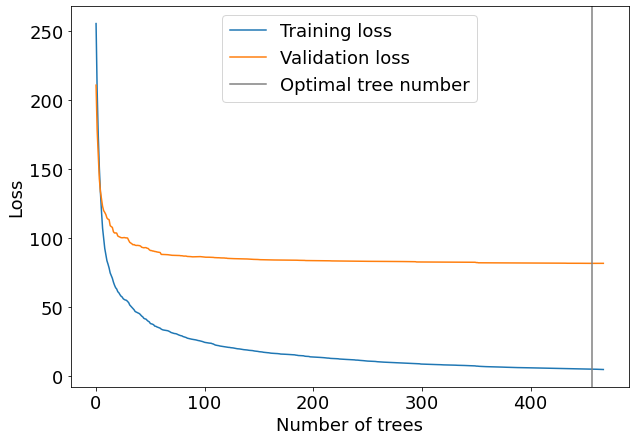

In [41]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(reg.best_iteration, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [42]:
reg.best_iteration

457

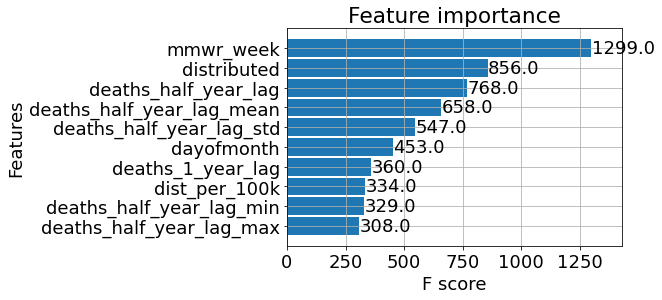

In [43]:
_ = plot_importance(reg, height=0.9 ,max_num_features = 10)

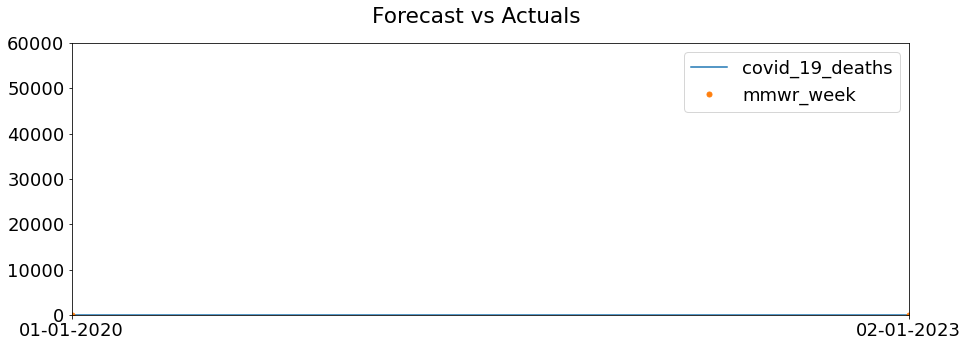

In [47]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data[['covid_19_deaths','mmwr_week']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='01-01-2020', upper='02-01-2023')
ax.set_ylim(0, 60000)
plot = plt.suptitle('Forecast vs Actuals')

In [55]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import itertools
import time
import matplotlib.pyplot as plt

excluded_cols = ['covid_19_deaths']
selected_cols = [col for col in features_and_target3.columns if col not in excluded_cols]

X = features_and_target3[selected_cols]

def processSubset(predictor_subset):
    formula = 'covid_19_deaths ~ mmwr_week' + ' distributed '.join(predictor_subset)
    model = sm.OLS.from_formula(formula, data=features_and_target3).fit()
    Rsquared = model.rsquared
    return {"model": model, "Rsquared": Rsquared}

def best_sub_plots(models_best):
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)
    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1 + rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    aic = models_best.apply(lambda row: row[1].aic, axis=1)
    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1 + aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)
    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1 + bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
    
def backward(predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    return best_model

def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1, len(X.columns) + 1))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while len(predictors) > 1:  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

# Run the backward selection
models_best = backward_selection()

# Plot the results
best_sub_plots(models_best)
plt.show()


SyntaxError: invalid syntax (<unknown>, line 1)

In [49]:
# Convert 'Rsquared' column to numeric
models_best['Rsquared'] = pd.to_numeric(models_best['Rsquared'])

# Get the features used in the best model
best_model_features = models_best.loc[models_best['Rsquared'].idxmax()]["model"].params.index[1:]

# Extract the corresponding column names from the original dataset
selected_features = X[best_model_features]

# Display the selected features
print("Selected Features:")
print(selected_features.columns)
print(len(selected_features.columns))

Selected Features:
Index(['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear', 'deaths_half_year_lag', 'deaths_1_year_lag',
       'deaths_1_andhalf_year_lag', 'deaths_2_years_lag',
       'deaths_half_year_lag_mean', 'deaths_1_year_lag_mean',
       'deaths_1_andhalf_year_lag_mean', 'deaths_2_years_lag_mean',
       'deaths_half_year_lag_std', 'deaths_1_year_lag_std',
       'deaths_1_andhalf_year_lag_std', 'deaths_2_years_lag_std',
       'deaths_half_year_lag_max', 'deaths_1_year_lag_max',
       'deaths_1_andhalf_year_lag_max', 'deaths_2_years_lag_max',
       'deaths_half_year_lag_min', 'deaths_1_year_lag_min',
       'deaths_1_andhalf_year_lag_min', 'deaths_2_years_lag_min'],
      dtype='object')
27


In [50]:
best_bwd_reg_model = models_best['model'][22]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        covid_19_deaths   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     567.3
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:07:57   Log-Likelihood:                -12213.
No. Observations:                2182   AIC:                         2.447e+04
Df Residuals:                    2159   BIC:                         2.460e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2.007e+05   1.56e+04     12.883      0.000     1.7e+05    2.31e+05
quarter                           39.0798      5.687      6.871      0.000      27.926      50.233
month                          -1450.1328     84.423    -17.177      0.000   -1615.692   -1284.573
year                             -98.5129      7.683    -12.822      0.000    -113.580     -83.446
dayofyear                         47.1186      2.769     17.018      0.000      41.689      52.548
dayofmonth                       -46.9186      2.774    -16.915      0.000     -52.358     -41.479
deaths_half_year_lag              -0.1854      0.010    -18.863      0.000      -0.205      -0.166
deaths_1_year_lag                  0.1790      0.008     23.751      0.000       0.164       0.194
deaths_1_andhalf_year_lag          0.0444      0.007      6.014      0.000       0.030       0.059
deaths_2_years_lag                 0.0235      0.005      5.207      0.000       0.015       0.032
deaths_half_year_lag_mean          0.1117      0.054      2.079      0.038       0.006       0.217
deaths_1_year_lag_mean             1.0688      0.073     14.542      0.000       0.925       1.213
deaths_1_andhalf_year_lag_mean    -0.2270      0.098     -2.324      0.020      -0.419      -0.035
deaths_2_years_lag_mean           -1.9573      0.126    -15.549      0.000      -2.204      -1.710
deaths_half_year_lag_std          -1.3034      0.109    -11.926      0.000      -1.518      -1.089
deaths_2_years_lag_std             2.1123      0.118     17.831      0.000       1.880       2.345
deaths_half_year_lag_max           0.5356      0.035     15.160      0.000       0.466       0.605
deaths_1_year_lag_max             -0.0706      0.014     -4.905      0.000      -0.099      -0.042
deaths_1_andhalf_year_lag_max      0.0411      0.009      4.411      0.000       0.023       0.059
deaths_2_years_lag_max            -0.2171      0.014    -15.655      0.000      -0.244      -0.190
deaths_half_year_lag_min          -0.0932      0.084     -1.112      0.266      -0.258       0.071
deaths_1_andhalf_year_lag_min      4.3629      0.181     24.075      0.000       4.007       4.718
deaths_2_years_lag_min            -3.6846      0.187    -19.723      0.000      -4.051      -3.318
==============================================================================
Omnibus:                      856.871   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16082.517
Skew:                           1.368   Prob(JB):                         0.00
Kurtosis:                      16.016   Cond. No.                     2.99e+07
==============================================================================

Notes:
[1] Standard Errors assume 

# More XG Boost 

# LSTM Multivariate - Not Required

Epoch 1/50
183/183 [==============================] - 6s 19ms/step - loss: 0.0023 - val_loss: 1.3571e-04
Epoch 2/50
183/183 [==============================] - 2s 9ms/step - loss: 0.0023 - val_loss: 1.0793e-04
Epoch 3/50
183/183 [==============================] - 2s 9ms/step - loss: 0.0023 - val_loss: 1.7961e-04
Epoch 4/50
183/183 [==============================] - 2s 9ms/step - loss: 0.0023 - val_loss: 1.5015e-04
Epoch 5/50
183/183 [==============================] - 2s 9ms/step - loss: 0.0023 - val_loss: 1.3126e-04
Epoch 6/50
183/183 [==============================] - 2s 10ms/step - loss: 0.0023 - val_loss: 9.0650e-05
Epoch 7/50
183/183 [==============================] - 2s 10ms/step - loss: 0.0023 - val_loss: 8.7645e-05
Epoch 8/50
183/183 [==============================] - 2s 8ms/step - loss: 0.0023 - val_loss: 1.6218e-04
Epoch 9/50
183/183 [==============================] - 1s 8ms/step - loss: 0.0023 - val_loss: 8.6861e-05
Epoch 10/50
183/183 [==============================] - 1s 8ms

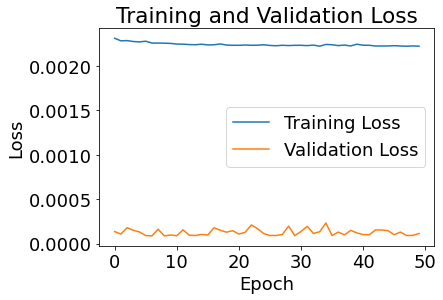

46/46 [==============================] - 0s 3ms/step


ValueError: x and y must have same first dimension, but have shapes (1452,) and (1462,)

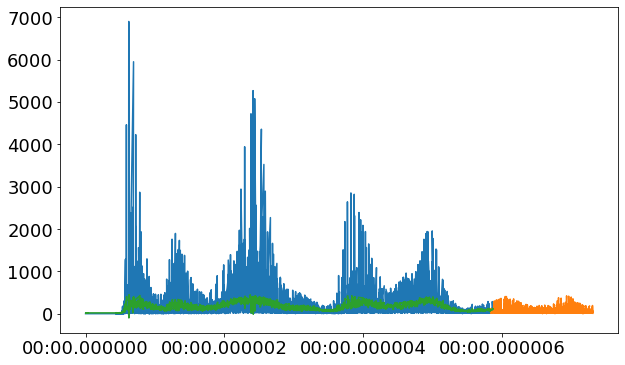

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'data' contains your dataset with a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
# Ensure that the index is a DateTimeIndex
data.index = pd.to_datetime(data.index)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['covid_19_deaths']])

# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Define function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 10  # You can adjust this value based on the sequence length you want to consider

# Create sequences for LSTM
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Define and train the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(train_data)], data['covid_19_deaths'][:len(train_data)], label='Train')
plt.plot(data.index[len(train_data)+seq_length:len(train_data)+seq_length+len(test_data)], data['covid_19_deaths'][len(train_data)+seq_length:len(train_data)+seq_length+len(test_data)], label='Test')
plt.plot(data.index[:len(train_data)], np.concatenate([np.full(seq_length, np.nan), train_predictions.flatten()]), label='Train Predictions')
plt.plot(data.index[len(train_data)+seq_length:], np.concatenate([np.full(seq_length, np.nan), test_predictions.flatten()]), label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('LSTM Forecast')
plt.legend()
plt.show()